In [1]:
import nltk

In [13]:
# Standard library imports
import string
import re
from io import StringIO

# Third-party library imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download, pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import metrics
from wordcloud import WordCloud
from gensim import corpora
from scipy.stats import randint
import contractions
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertModel
import torch

In [14]:
file_path  = "C:/Users/Ajla/Downloads/lyrics.csv"

In [17]:
data = pd.read_csv(file_path, encoding='latin1')

In [19]:
pos_mapping = {
    'NN': 'NOUN',
    'NNS': 'NOUN',
    'NNPS': 'NOUN',
    'VB': 'VERB',
    'VBD': 'VERB',
    'VBG': 'VERB',
    'VBN': 'VERB',
    'VBP': 'VERB',
    'VBZ': 'VERB',
    'JJ': 'ADJ',
    'JJR': 'ADJ',
    'JJS': 'ADJ'
}

In [21]:
def preprocess(text):
    
    if not isinstance(text, str):
        return ""

    text = text.split('\n', 1)[-1] #skips the first line
    text = re.sub(r"\*.*?\*", "", text) #skips *word*
    text = contractions.fix(text) #fixes contractions 
    text = re.sub(r"\[.*?\]", "", text) #skips [word]
    text = re.sub(r"\(.*?\)", "", text) #skips (word)
    tokens = word_tokenize(text) 
    tokens = [re.sub(r'[^a-zA-Z]+$', '', word) for word in tokens] #just leaves letters
    tokens = [word.lower() for word in tokens]

    #filler_phrases = ["na", "oh", "doo", "la", "yeah", "da", "hey", "woah", "uh", "ooh", "baby", "love", "know", "get", "got", "want", "time", "going", "make", "see", "go", "let"]
    stop_words = set(stopwords.words('english'))
    #all_stopwords = stop_words.union(set(filler_phrases))
    tokens = [word for word in tokens if word not in stop_words]
    
    if tokens:
        tokens[-1] = re.sub(r'(embed)$', '', tokens[-1]) 
        tokens[-1] = re.sub(r'(\d+)$', '', tokens[-1])  
        
    tokens = [word for word in tokens if word != '']
    
    tagged_tokens = pos_tag(tokens)
    lemmatized_tokens = [
        lemmatizer.lemmatize(word)
        for word, tag in tagged_tokens
        if tag[:2] in pos_mapping and pos_mapping[tag[:2]] in ['NOUN', 'VERB', 'ADJ']
    ]
    
    return " ".join(lemmatized_tokens)

In [23]:
data['cleaned_lyrics'] = data['lyrics'].astype(str).apply(preprocess)

In [24]:
print('\nLyrics')
print(data['lyrics'][6])
print('\nCleaned Lyrics')
print(data['cleaned_lyrics'][6])


Lyrics
Won't Get Fooled Again Lyrics[Verse 1]
We'll be fighting in the streets
With our children at our feet
And the morals that they worship will be gone
And the men who spurred us on
Sit in judgment of all wrong
They decide and the shotgun sings the song

[Chorus]
I'll tip my hat to the new Constitution
Take a bow for the new revolution
Smile and grin at the change all around
Pick up my guitar and play
Just like yesterday
Then I'll get on my knees and pray
We don't get fooled again
[Verse 2]
Change, it had to come
We knew it all along
We were liberated from the fold, that's all
And the world looks just the same
And history ain't changed
'Cause the banners, they all flown in the last war

[Chorus]
I'll tip my hat to the new Constitution
Take a bow for the new revolution
Smile and grin at the change all around
Pick up my guitar and play
Just like yesterday
Then I'll get on my knees and pray
We don't get fooled again
No, no

[Bridge]
I'll move myself and my family aside
If we happen to

		CLASSIFICATION REPORT

               precision    recall  f1-score   support

          R&B       0.68      0.65      0.66       181
      country       0.75      0.74      0.74       186
rap & hip hop       0.90      0.95      0.92       134
         rock       0.65      0.66      0.65       200

     accuracy                           0.73       701
    macro avg       0.74      0.75      0.75       701
 weighted avg       0.73      0.73      0.73       701



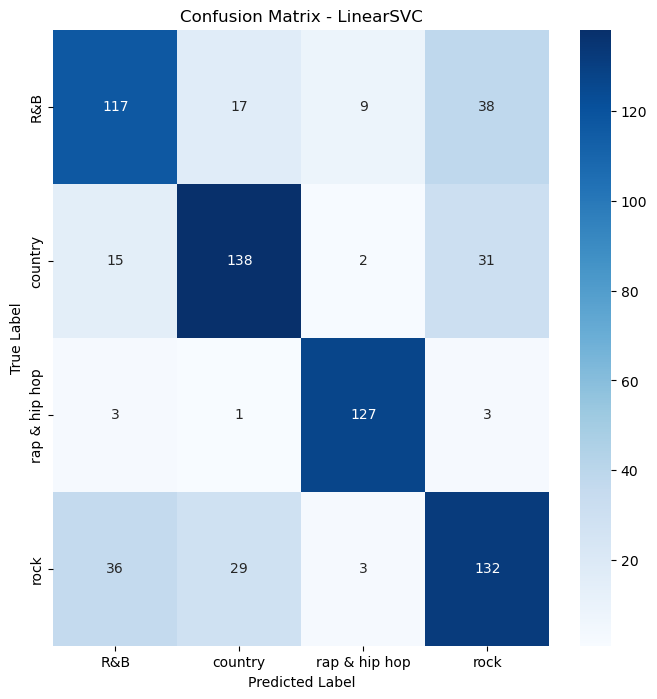

In [25]:
# Convert lyrics into TF-IDF features
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=1, max_df = 0.5, ngram_range=(1, 3), stop_words='english')
X = vectorizer.fit_transform(data['cleaned_lyrics'])
y = data['type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Train a Linear SVC model
classifier = LinearSVC()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Display classification metrics
print("\t\tCLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - LinearSVC")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")


Overall Accuracy: 73.32%


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n n-grams
def get_top_ngrams(corpus, n=5, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    word_freq = bag_of_words.sum(axis=0).A1
    vocab = vec.get_feature_names_out()
    return sorted(zip(vocab, word_freq), key=lambda x: x[1], reverse=True)[:n]

# Compute top n-grams by genre
genres = data['type'].unique()
genre_top_ngrams = {
    genre: {
        'unigrams': get_top_ngrams(data[data['type'] == genre]['cleaned_lyrics'], n=5, ngram_range=(1, 1)),
        'bigrams': get_top_ngrams(data[data['type'] == genre]['cleaned_lyrics'], n=5, ngram_range=(2, 2))
    } for genre in genres
}

# Print results
for genre, ngrams in genre_top_ngrams.items():
    print(f"Genre: {genre}\nTop 5 Unigrams: {ngrams['unigrams']}\nTop 5 Bigrams: {ngrams['bigrams']}\n")


Genre: rock
Top 5 Unigrams: [('love', 1571), ('got', 1567), ('know', 1423), ('oh', 1176), ('come', 1161)]
Top 5 Bigrams: [('na na', 333), ('oh oh', 306), ('doo doo', 287), ('yeah yeah', 277), ('do do', 194)]

Genre: rap & hip hop
Top 5 Unigrams: [('got', 3164), ('get', 3115), ('nigga', 2398), ('know', 1998), ('want', 1479)]
Top 5 Bigrams: [('hip hop', 211), ('get get', 210), ('new york', 199), ('get high', 128), ('know know', 102)]

Genre: R&B
Top 5 Unigrams: [('love', 3403), ('baby', 2738), ('want', 2327), ('know', 2266), ('got', 2009)]
Top 5 Bigrams: [('oh oh', 600), ('doo doo', 366), ('say say', 327), ('baby baby', 311), ('love love', 291)]

Genre: country
Top 5 Unigrams: [('love', 1488), ('got', 1443), ('know', 1273), ('going', 934), ('time', 932)]
Top 5 Bigrams: [('oh oh', 110), ('yeah yeah', 86), ('love love', 78), ('let go', 72), ('want go', 66)]



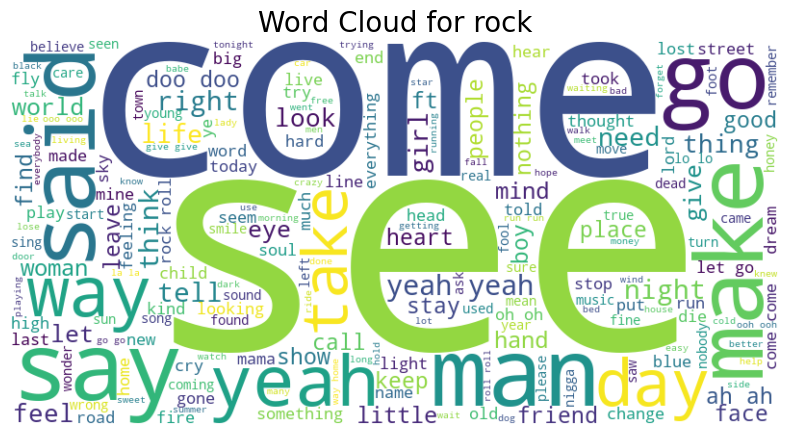

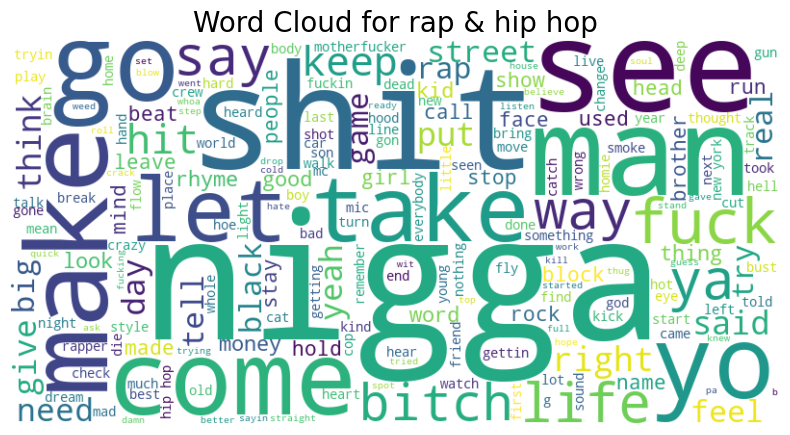

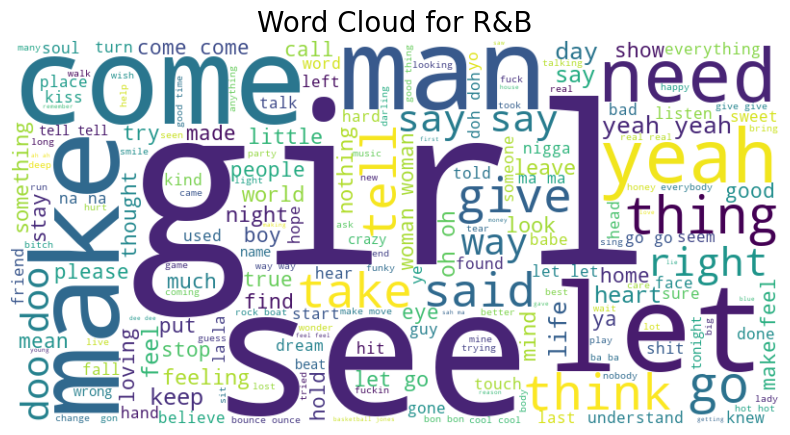

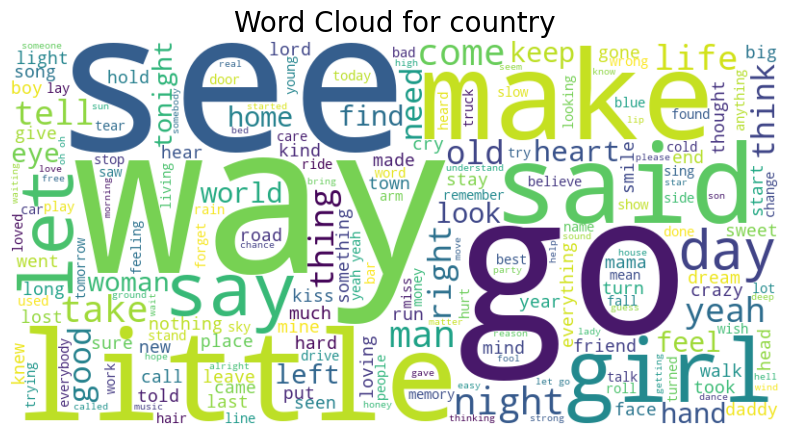

In [732]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Generate word clouds for each genre
genres = data['type'].unique()
for genre in genres:
    genre_text = " ".join(data[data['type'] == genre]['cleaned_lyrics'])
    plot_word_cloud(genre_text, f"Word Cloud for {genre}")


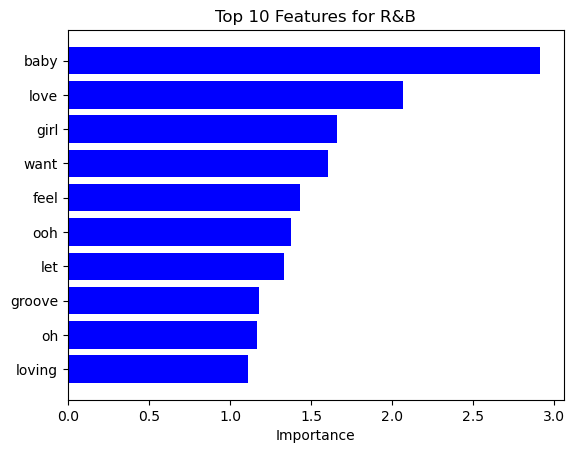

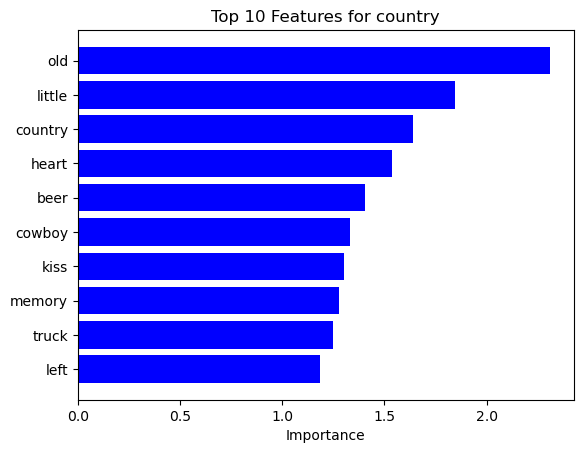

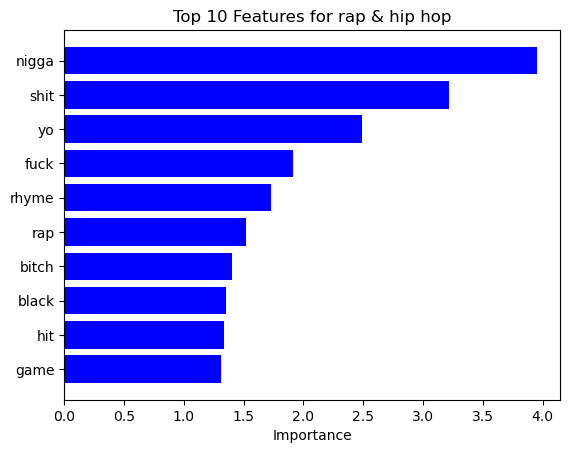

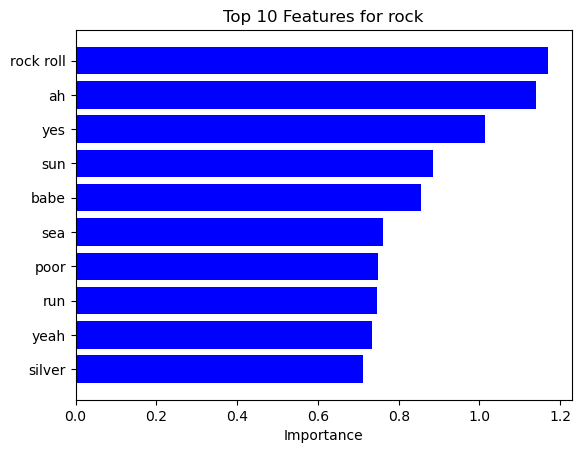

In [33]:
# Plot top features for a genre
def plot_top_features(genre, model, vectorizer, top_n=10):
    genre_idx = np.where(model.classes_ == genre)[0][0]
    feature_names = vectorizer.get_feature_names_out()
    coefficients = model.coef_
    
    top_idx = np.argsort(coefficients[genre_idx])[-top_n:]
    top_features = feature_names[top_idx]
    top_weights = coefficients[genre_idx, top_idx]
    
    plt.barh(top_features, top_weights, color='blue')
    plt.xlabel("Importance")
    plt.title(f"Top {top_n} Features for {genre}")
    plt.show()

# Generate plots for all genres
for genre in classifier.classes_:
    plot_top_features(genre, classifier, vectorizer)


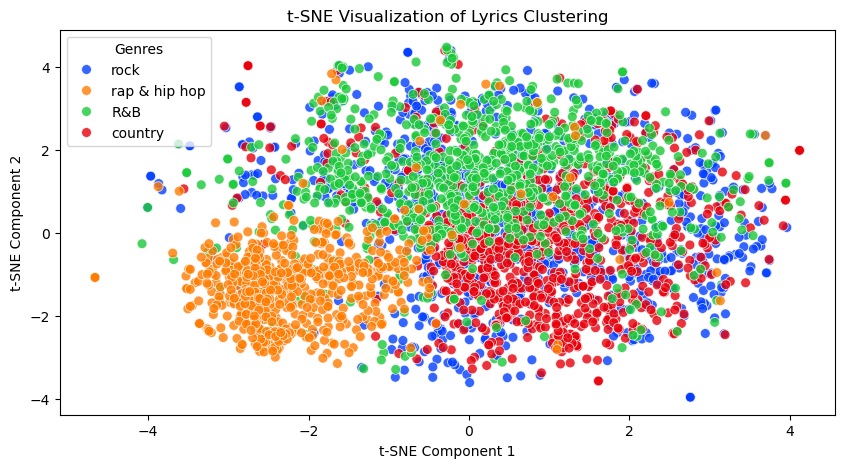

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Vectorize the lyrics using TF-IDF
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
lyrics_vector = tfidf.fit_transform(data['cleaned_lyrics'])

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=0, init='random', perplexity=30)
lyrics_tsne = tsne.fit_transform(lyrics_vector.toarray())

# Plot t-SNE results
plt.figure(figsize=(10, 5))
sns.scatterplot(x=lyrics_tsne[:, 0], y=lyrics_tsne[:, 1], hue=data['type'], palette='bright', s=50, alpha=0.8)
plt.title('t-SNE Visualization of Lyrics Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Genres', loc='best')
plt.show()

In [43]:
# Find NaN values in the dataset and print their indexes
nan_indices = data[data.isna().any(axis=1)].index
print("Rows with NaN values found at indices:", nan_indices)

# To print the columns where NaNs are located in each row
for idx in nan_indices:
    print(f"Row {idx} has NaNs in columns: {data.columns[data.iloc[idx].isna()].tolist()}")

Rows with NaN values found at indices: Index([], dtype='int64')
